# Entrega laboratorio 3

## Integrantes 

- Javier Steven Barrera Toro - 202214779
- Julian Santiago Rolon Toloza - 202215839

In [97]:
from matplotlib import pyplot as plt
import numpy as np
import sympy as sp

# Problema 1

En este punto se nos pide implementar el método Netwon-Raphson para encontrar los extremos locales de la función $f(x) = 3x^3 - 10x^2 - 56 x + 50$ dentro del intervalo $[-6, 6]$. La siguiente gráfica corresponde a la función de la cual se desean hallar los extremos locales. 

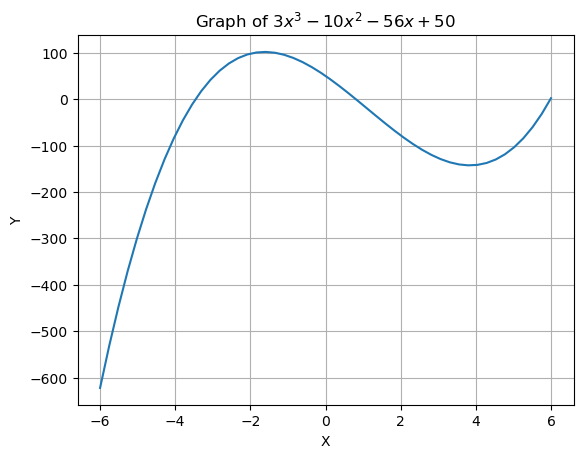

In [7]:
X = np.linspace(-6, 6, 50)
Y = 3 * X ** 3 - 10 * X ** 2 - 56 * X + 50

plt.plot(X, Y)
plt.grid()
plt.title('Graph of $3x^3 - 10x^2 - 56x + 50$')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Implementación del algoritmo de Newton-Raphson

In [132]:
def newton_raphson(initial_guess: int, tolerance: float, N_max: int, alpha: float, function) -> float:
    """Function to execute the 1D Newton-Raphson method given a function and its derivative.

    Args:
        initial_guess (int): The initial guess for the minimum value of the function.
        tolerance (float): The tolerance for the minimum value of the function.
        N_max (int): The maximum number of iterations to be executed.
        alpha (float): The alpha value for the Newton-Raphson method.
        function (): The function to be minimized in Sympy format.

    Returns:
        float: The minimum value of the function.
    """
    k = 0
    x = [initial_guess]

    derivative = sp.lambdify('x', sp.diff(function, 'x'), 'numpy')
    double_derivative = sp.lambdify('x', sp.diff(sp.diff(function), 'x'), 'numpy')

    while k < N_max:
        f_prime_val = derivative(x[k])
        if abs(f_prime_val) < tolerance:
            break
        
        f_double_prime_val = double_derivative(x[k])
        if f_double_prime_val == 0:
            raise ValueError("The second derivative is zero.")

        d_k = - alpha * f_prime_val / f_double_prime_val
        
        x.append(x[k] + d_k)
        k += 1
    
    return x[-1]

In [100]:
function = sp.simplify('3*x**3 - 10*x**2 - 56*x + 50')

## Calculo análitico de las derivadas de $f(x)$

Calculemos las derivadas de manera análitica para el método de 1 dimensión. Dada $f(x) = 3x^3 - 10x^2 - 56 x + 50$, la derivada $f'(x)$ es:
$$
9x^2 - 20x - 56
$$

Asimismo, la segunda derivada $f^{(2)}(x)$ de la función corresponde a:
$$
18x - 20
$$

## Diferentes valores iniciales $x_0$

In [134]:
x_0 = np.arange(-6, 7, 1)
minimum = [newton_raphson(x, 1e-6, 100, 0.05, function) for x in x_0]

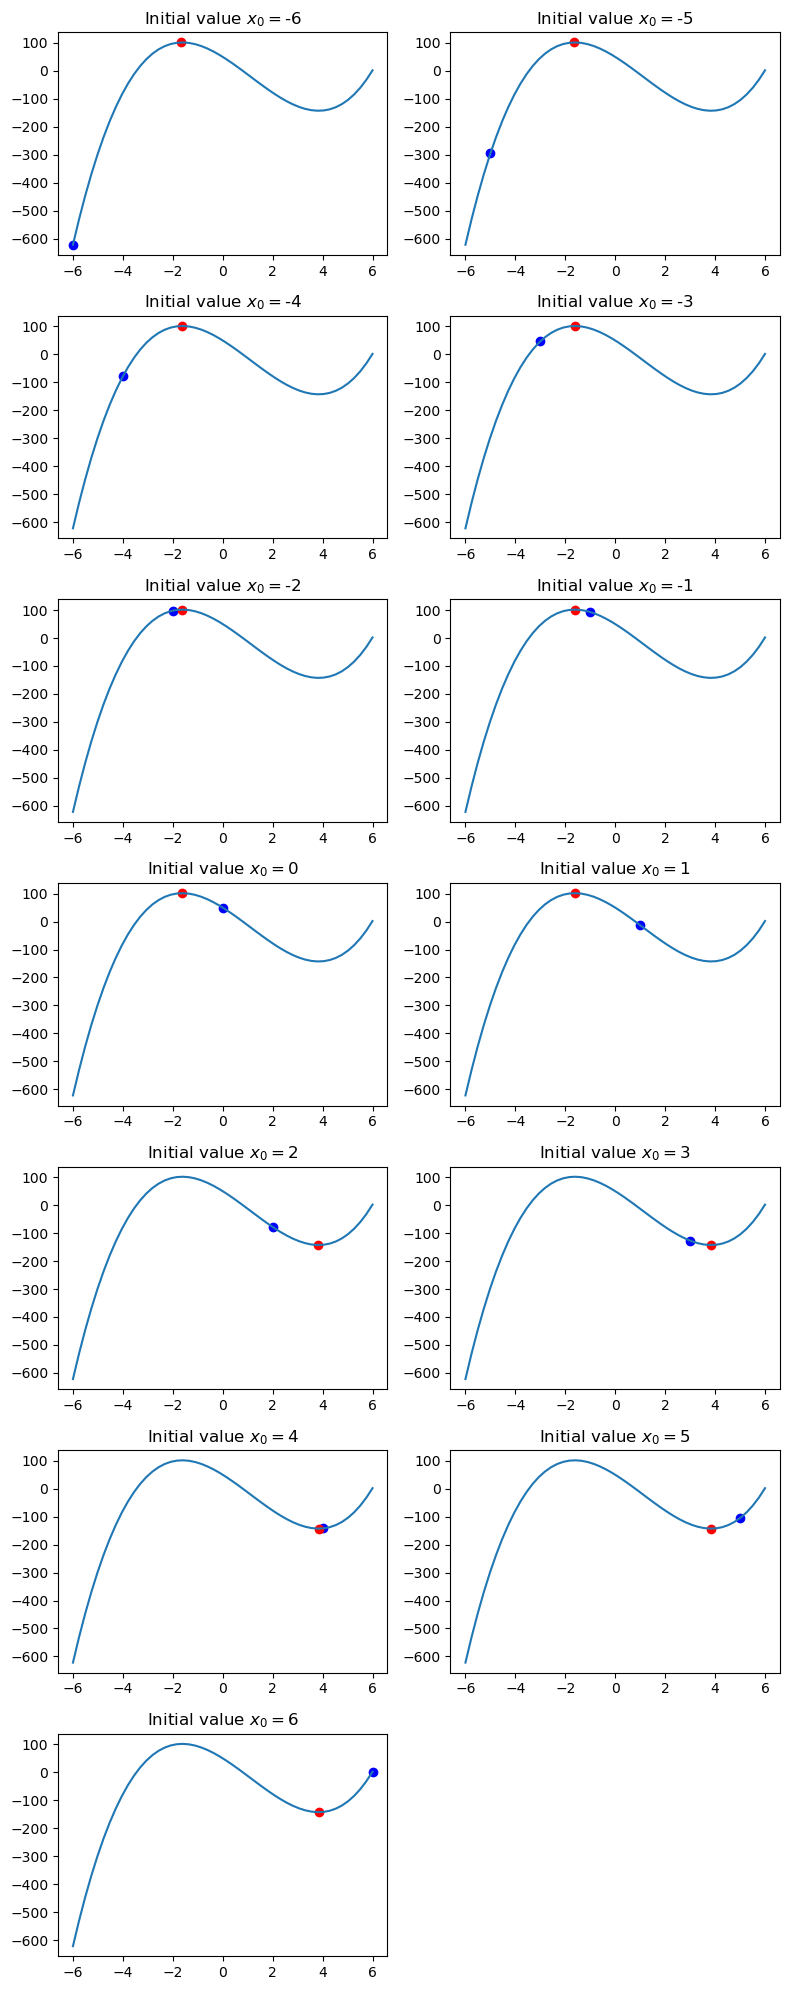

In [136]:
X = np.linspace(-6, 6, 50)
Y = 3 * X ** 3 - 10 * X ** 2 - 56 * X + 50

plt.figure(figsize=(8,20), tight_layout=True)

for i, x in enumerate(x_0):
    x_min = newton_raphson(x, 1e-6, 100, 0.05, function)

    plt.subplot(7, 2, i + 1)
    plt.plot(X, Y)
    plt.scatter(x, 3 * x ** 3 - 10 * x ** 2 - 56 * x + 50, color='blue')
    plt.scatter(x_min, 3 * x_min ** 3 - 10 * x_min ** 2 - 56 * x_min + 50, color='red')
    plt.title(f'Initial value $x_0 = ${x}')

## Diferentes valores iniciales de $\alpha$

In [137]:
alphas = np.linspace(0, 0.5, 10)
minimum = [newton_raphson(0, 1e-6, 100, alpha, function) for alpha in alphas]

## Gráfica con los puntos encontrados

## Análisis del comportamiento de convergencia

# Problema 2

# Problema 3

# Problema 4

# Problema 5